***IMPORT***

In [2]:
#data analisys
import pandas as pd

#graphs
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#test_train
from sklearn.model_selection import train_test_split

#ml
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


#metrics
from sklearn.metrics import classification_report


#one of the cross validation techniques
from sklearn.model_selection import cross_val_score

#one of hyperparameter techniques
from sklearn import model_selection

***LOAD DATA***

In [3]:
file = 'heart.csv'
data = pd.read_csv(file)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


***DATA INFO AND DESCRIBE***

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
#Nan values ?
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

***DATA ANALISYS***

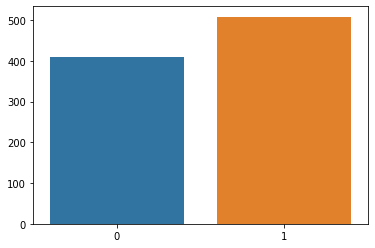

In [7]:
#checking if the data is balaceded or not
HeartDisease_X_axis = data.HeartDisease.value_counts().index
HeartDisease_y_axis = data.HeartDisease.value_counts().values

#graph
sns.barplot(x=HeartDisease_X_axis ,y=HeartDisease_y_axis, data=data)
plt.show()

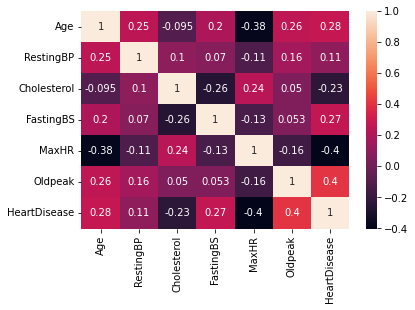

In [8]:
#correlationship between some numeric features
sns.heatmap(data.corr(), annot=True)
plt.show()

***TESTING FEATURE SCALING IN A DATA COPY TO SEE IF WORK BETTER IN A ML ALGORITHM***

In [10]:
#doing a copy
data_test = data.copy()

In [11]:
data_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
#instantiating an object
scaler = MinMaxScaler()

In [13]:
#feature scaling some labels
data_test[['RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']] = scaler.fit_transform(data_test[['RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']])

In [14]:
data_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,0.70,0.479270,0.0,Normal,0.788732,N,0.295455,Up,0
1,49,F,NAP,0.80,0.298507,0.0,Normal,0.676056,N,0.409091,Flat,1
2,37,M,ATA,0.65,0.469320,0.0,ST,0.267606,N,0.295455,Up,0
3,48,F,ASY,0.69,0.354892,0.0,Normal,0.338028,Y,0.465909,Flat,1
4,54,M,NAP,0.75,0.323383,0.0,Normal,0.436620,N,0.295455,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,0.55,0.437811,0.0,Normal,0.507042,N,0.431818,Flat,1
914,68,M,ASY,0.72,0.320066,1.0,Normal,0.570423,N,0.681818,Flat,1
915,57,M,ASY,0.65,0.217247,0.0,Normal,0.387324,Y,0.431818,Flat,1
916,57,F,ATA,0.65,0.391376,0.0,LVH,0.802817,N,0.295455,Flat,1


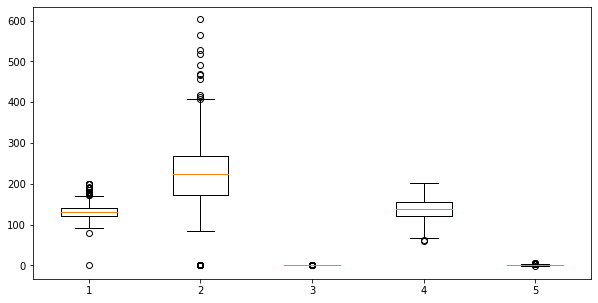

In [15]:
#normal data
plt.figure(figsize=(10,5))
plt.boxplot(data[['RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']])
plt.show()

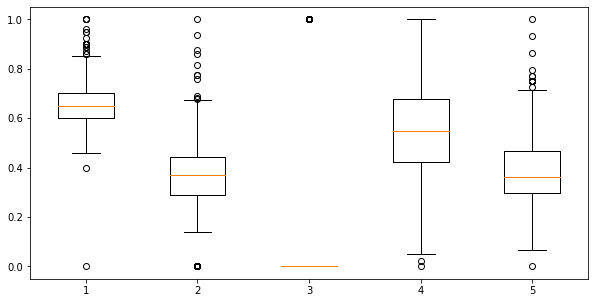

In [16]:
#scaling data
plt.figure(figsize=(10,5))
plt.boxplot(data_test[['RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']])
plt.show()

***MODELING DATA***

In [18]:
#encoder definition
encoder = LabelEncoder()

In [19]:
#filter all categorical data

cat_label = [x for x in data.columns if data[x].dtype=='object']

In [20]:
#encoding all categorical labels - have to pass one column at time
for e in cat_label:
    data[e] = encoder.fit_transform(data[e])
    
#encoding the scaler data
    data_test[e] = encoder.fit_transform(data_test[e])

In [22]:
#scaling data overview
data_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,0.70,0.479270,0.0,1,0.788732,0,0.295455,2,0
1,49,0,2,0.80,0.298507,0.0,1,0.676056,0,0.409091,1,1
2,37,1,1,0.65,0.469320,0.0,2,0.267606,0,0.295455,2,0
3,48,0,0,0.69,0.354892,0.0,1,0.338028,1,0.465909,1,1
4,54,1,2,0.75,0.323383,0.0,1,0.436620,0,0.295455,2,0


In [23]:
#normal data overview
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


***ML MODELS***

In [27]:
#split the data into x -> condiction labels and y -> target label
x = data.drop('HeartDisease',axis=1)
y = data.HeartDisease


X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
#split the data_test into x -> condiction labels and y -> target label
x_scaler = data_test.drop('HeartDisease',axis=1)
y_scaler = data_test.HeartDisease


X_train_scaler,X_test_scaler,y_train_scaler,y_test_scaler = train_test_split(x_scaler,y_scaler,test_size=0.2)

***USING MULTIPLE ALGORITHMS***

In [26]:
#list of models

KNC = KNeighborsClassifier(n_neighbors=4)
KM = KMeans(1,max_iter=200)
LR = LogisticRegression(max_iter=300)
models = [KNC,KM,LR]

In [29]:
#loops model integration in the normal data
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print(model)
    print(classification_report(y_test,pred))

KNeighborsClassifier(n_neighbors=4)
              precision    recall  f1-score   support

           0       0.56      0.78      0.65        77
           1       0.78      0.55      0.64       107

    accuracy                           0.65       184
   macro avg       0.67      0.67      0.65       184
weighted avg       0.68      0.65      0.65       184

KMeans(max_iter=200, n_clusters=1)
              precision    recall  f1-score   support

           0       0.42      1.00      0.59        77
           1       0.00      0.00      0.00       107

    accuracy                           0.42       184
   macro avg       0.21      0.50      0.30       184
weighted avg       0.18      0.42      0.25       184



C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression(max_iter=300)
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
#loops model integration in the scaling  data
for model in models:
    model.fit(X_train_scaler,y_train_scaler)
    pred = model.predict(X_test_scaler)
    print(model)
    print(classification_report(y_test_scaler,pred))

KNeighborsClassifier(n_neighbors=4)
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        88
           1       0.76      0.72      0.74        96

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
weighted avg       0.74      0.73      0.73       184

KMeans(max_iter=200, n_clusters=1)
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        88
           1       0.00      0.00      0.00        96

    accuracy                           0.48       184
   macro avg       0.24      0.50      0.32       184
weighted avg       0.23      0.48      0.31       184



C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression(max_iter=300)
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        88
           1       0.81      0.86      0.83        96

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



***CROSS VALIDATION***

In [31]:
#split the normal data to fit in the cross validation algorithm
labels,target = data.drop(columns= ['HeartDisease']), data['HeartDisease']

#split the scaling data to fit in the cross validation algorithm
labels_scaler,target_scaler = data_test.drop(columns= ['HeartDisease']), data_test['HeartDisease']

In [32]:
#cross validation in the normal data
for model in models:
    scores = cross_val_score(model , labels , target , cv=5 , scoring = 'accuracy')
    print('MODEL:',model)
    print('SCORE:',scores.mean())
    print('')

MODEL: KNeighborsClassifier(n_neighbors=4)
SCORE: 0.6262948443810881

MODEL: KMeans(max_iter=200, n_clusters=1)
SCORE: 0.4467213114754099



C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

MODEL: LogisticRegression(max_iter=300)
SCORE: 0.8082442385364693



C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
#cross validation in the scaling data
for model in models:
    scores = cross_val_score(model , labels_scaler , target_scaler , cv=5 , scoring = 'accuracy')
    print('MODEL:',model)
    print('SCORE:',scores.mean())
    print('')

MODEL: KNeighborsClassifier(n_neighbors=4)
SCORE: 0.7809396531242576

MODEL: KMeans(max_iter=200, n_clusters=1)
SCORE: 0.4467213114754099



C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL: LogisticRegression(max_iter=300)
SCORE: 0.8202185792349728



***HYPERPARAMETER***

In [36]:
#using hyperparameters to try to improve the performance of the best model

#creating a dictionary where the keys are the name of the parameters and the range of parameters is inside a list

param_grid = {'penalty':['l2','l1','elasticnet'],
              'fit_intercept' : [True,False],
              'max_iter' : [100,200,300]
             }


#declaring GridSearchCV model
mode = model_selection.GridSearchCV(
    estimator = LR,
    param_grid = param_grid,
    scoring = 'accuracy',
    verbose = 10,
    n_jobs = 1,
    cv=5


)

In [37]:
#traing the scaling data
mode.fit(labels_scaler,target_scaler)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START fit_intercept=True, max_iter=100, penalty=l2...............
[CV 1/5; 1/18] END fit_intercept=True, max_iter=100, penalty=l2;, score=0.832 total time=   0.1s
[CV 2/5; 1/18] START fit_intercept=True, max_iter=100, penalty=l2...............


C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 2/5; 1/18] END fit_intercept=True, max_iter=100, penalty=l2;, score=0.826 total time=   0.2s
[CV 3/5; 1/18] START fit_intercept=True, max_iter=100, penalty=l2...............


C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 3/5; 1/18] END fit_intercept=True, max_iter=100, penalty=l2;, score=0.842 total time=   0.1s
[CV 4/5; 1/18] START fit_intercept=True, max_iter=100, penalty=l2...............
[CV 4/5; 1/18] END fit_intercept=True, max_iter=100, penalty=l2;, score=0.836 total time=   0.1s
[CV 5/5; 1/18] START fit_intercept=True, max_iter=100, penalty=l2...............


C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 1/18] END fit_intercept=True, max_iter=100, penalty=l2;, score=0.760 total time=   0.1s
[CV 1/5; 2/18] START fit_intercept=True, max_iter=100, penalty=l1...............
[CV 1/5; 2/18] END fit_intercept=True, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 2/18] START fit_intercept=True, max_iter=100, penalty=l1...............
[CV 2/5; 2/18] END fit_intercept=True, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 2/18] START fit_intercept=True, max_iter=100, penalty=l1...............
[CV 3/5; 2/18] END fit_intercept=True, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 2/18] START fit_intercept=True, max_iter=100, penalty=l1...............
[CV 4/5; 2/18] END fit_intercept=True, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 2/18] START fit_intercept=True, max_iter=100, penalty=l1...............
[CV 5/5; 2/18] END fit_intercept=True, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 3/18] START fi

C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 4/18] END fit_intercept=True, max_iter=200, penalty=l2;, score=0.832 total time=   0.6s
[CV 2/5; 4/18] START fit_intercept=True, max_iter=200, penalty=l2...............


C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 4/18] END fit_intercept=True, max_iter=200, penalty=l2;, score=0.826 total time=   0.3s
[CV 3/5; 4/18] START fit_intercept=True, max_iter=200, penalty=l2...............
[CV 3/5; 4/18] END fit_intercept=True, max_iter=200, penalty=l2;, score=0.842 total time=   0.3s
[CV 4/5; 4/18] START fit_intercept=True, max_iter=200, penalty=l2...............
[CV 4/5; 4/18] END fit_intercept=True, max_iter=200, penalty=l2;, score=0.842 total time=   0.2s
[CV 5/5; 4/18] START fit_intercept=True, max_iter=200, penalty=l2...............


C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 4/18] END fit_intercept=True, max_iter=200, penalty=l2;, score=0.760 total time=   0.2s
[CV 1/5; 5/18] START fit_intercept=True, max_iter=200, penalty=l1...............
[CV 1/5; 5/18] END fit_intercept=True, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 5/18] START fit_intercept=True, max_iter=200, penalty=l1...............
[CV 2/5; 5/18] END fit_intercept=True, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 5/18] START fit_intercept=True, max_iter=200, penalty=l1...............
[CV 3/5; 5/18] END fit_intercept=True, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 5/18] START fit_intercept=True, max_iter=200, penalty=l1...............
[CV 4/5; 5/18] END fit_intercept=True, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 5/18] START fit_intercept=True, max_iter=200, penalty=l1...............
[CV 5/5; 5/18] END fit_intercept=True, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 6/18] START fi

C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 7/18] END fit_intercept=True, max_iter=300, penalty=l2;, score=0.826 total time=   0.6s
[CV 3/5; 7/18] START fit_intercept=True, max_iter=300, penalty=l2...............
[CV 3/5; 7/18] END fit_intercept=True, max_iter=300, penalty=l2;, score=0.842 total time=   0.1s
[CV 4/5; 7/18] START fit_intercept=True, max_iter=300, penalty=l2...............
[CV 4/5; 7/18] END fit_intercept=True, max_iter=300, penalty=l2;, score=0.842 total time=   0.2s
[CV 5/5; 7/18] START fit_intercept=True, max_iter=300, penalty=l2...............
[CV 5/5; 7/18] END fit_intercept=True, max_iter=300, penalty=l2;, score=0.760 total time=   0.2s
[CV 1/5; 8/18] START fit_intercept=True, max_iter=300, penalty=l1...............
[CV 1/5; 8/18] END fit_intercept=True, max_iter=300, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 8/18] START fit_intercept=True, max_iter=300, penalty=l1...............
[CV 2/5; 8/18] END fit_intercept=True, max_iter=300, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 8/18] ST

C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 1/5; 10/18] END fit_intercept=False, max_iter=100, penalty=l2;, score=0.832 total time=   0.1s
[CV 2/5; 10/18] START fit_intercept=False, max_iter=100, penalty=l2.............
[CV 2/5; 10/18] END fit_intercept=False, max_iter=100, penalty=l2;, score=0.826 total time=   0.1s
[CV 3/5; 10/18] START fit_intercept=False, max_iter=100, penalty=l2.............
[CV 3/5; 10/18] END fit_intercept=False, max_iter=100, penalty=l2;, score=0.837 total time=   0.2s
[CV 4/5; 10/18] START fit_intercept=False, max_iter=100, penalty=l2.............


C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 4/5; 10/18] END fit_intercept=False, max_iter=100, penalty=l2;, score=0.836 total time=   0.1s
[CV 5/5; 10/18] START fit_intercept=False, max_iter=100, penalty=l2.............
[CV 5/5; 10/18] END fit_intercept=False, max_iter=100, penalty=l2;, score=0.770 total time=   0.1s
[CV 1/5; 11/18] START fit_intercept=False, max_iter=100, penalty=l1.............
[CV 1/5; 11/18] END fit_intercept=False, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 11/18] START fit_intercept=False, max_iter=100, penalty=l1.............
[CV 2/5; 11/18] END fit_intercept=False, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 11/18] START fit_intercept=False, max_iter=100, penalty=l1.............
[CV 3/5; 11/18] END fit_intercept=False, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 11/18] START fit_intercept=False, max_iter=100, penalty=l1.............
[CV 4/5; 11/18] END fit_intercept=False, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 

C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\wendr\virtual enviroments\study\lib\site-packages\sklearn\linear_model\_log

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300), n_jobs=1,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=10)

In [38]:
#best parameters
print(mode.best_params_)

print()

#best estimators
print(mode.best_estimator_)

#best score

print(mode.best_score_)

{'fit_intercept': False, 'max_iter': 100, 'penalty': 'l2'}

LogisticRegression(fit_intercept=False)
0.8202245188880969
